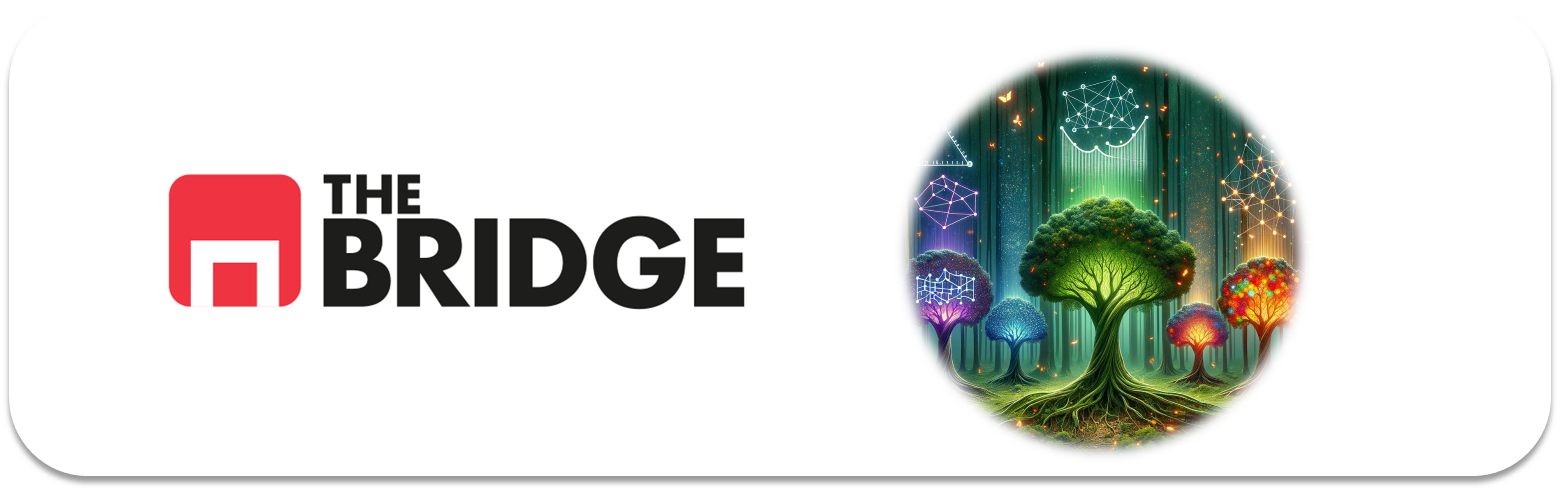

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [3]:
# Voy a cargar el dataset
df = pd.read_csv(url)
df.columns = names
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Voy a echarle un vistazo
df.sample(20)


,preg,plas,pres,skin,test,mass,pedi,age,class
57,0,146,82,0,0,40.5,1.781,44,0
762,10,101,76,48,180,32.9,0.171,63,0
372,2,105,58,40,94,34.9,0.225,25,0
127,1,117,88,24,145,34.5,0.403,40,1
234,4,171,72,0,0,43.6,0.479,26,1
455,1,135,54,0,0,26.7,0.687,62,0
375,0,98,82,15,84,25.2,0.299,22,0
100,1,151,60,0,0,26.1,0.179,22,0
641,6,147,80,0,0,29.5,0.178,50,1
613,11,138,74,26,144,36.1,0.557,50,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Apaentemente el dataset no tiene missings, voy a darle alguna vuelta más
df.value_counts()

preg  plas  pres  skin  test  mass  pedi   age  class
17    163   72    41    114   40.9  0.817  47   1        1
0     57    60    0     0     21.7  0.735  67   0        1
      67    76    0     0     45.3  0.194  46   0        1
      73    0     0     0     21.1  0.342  25   0        1
      74    52    10    36    27.8  0.269  22   0        1
                                                        ..
      98    82    15    84    25.2  0.299  22   0        1
      97    64    36    100   36.8  0.600  25   0        1
      95    85    25    36    37.4  0.247  24   1        1
            80    45    92    36.5  0.330  26   0        1
            64    39    105   44.6  0.366  22   0        1
Name: count, Length: 767, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

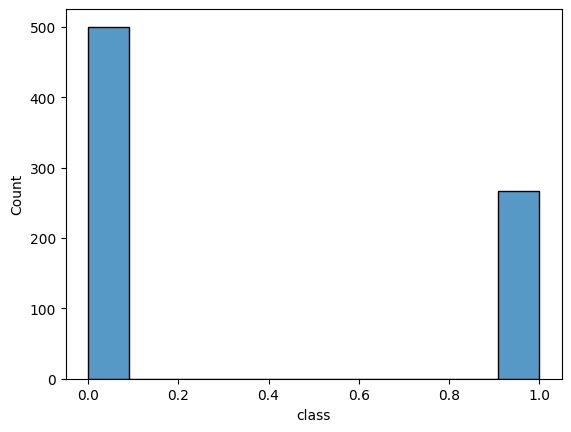

In [7]:
# Nuestra variable target es class, ya que nos la indica en el enunciado
# Observo su distribución
sns.histplot(df['class'])

In [8]:
# Podemos decir que no esta muy desequilibrada
target = 'class'

In [9]:
# bt.pinta_distribucion_categoricas 8 df, [target], mostrar_valores =  True, relativa = True)

In [10]:
# Hacemos split
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)


In [11]:
# Mini EDA
# Separamos variables numéricas y categoricas, para ello voy a clasificarlas segun su cardinalidad
df_tipificacion = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
# Ahora ya si las clasificamos en función de los resultados de las operaciones realizadas en el apartado anterior
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica continua"
print(df_tipificacion) 


      Card     %_Card     Tipo   Clasificada_como
preg    17   2.773246    int64  Numerica discreta
plas   132  21.533442    int64  Numerica discreta
pres    45   7.340946    int64  Numerica discreta
skin    50   8.156607    int64  Numerica discreta
test   165  26.916803    int64  Numerica discreta
mass   231  37.683524  float64  Numerica continua
pedi   442  72.104405  float64  Numerica continua
age     52   8.482871    int64  Numerica discreta
class    2   0.326264    int64            Binaria


In [12]:
# Según nuestra tipificación parece que todas nuestras variables son numéricas discretas y contínuas, salvo la target que es binaria
# Por lo que sólo vamos a tener features_num
features_num = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

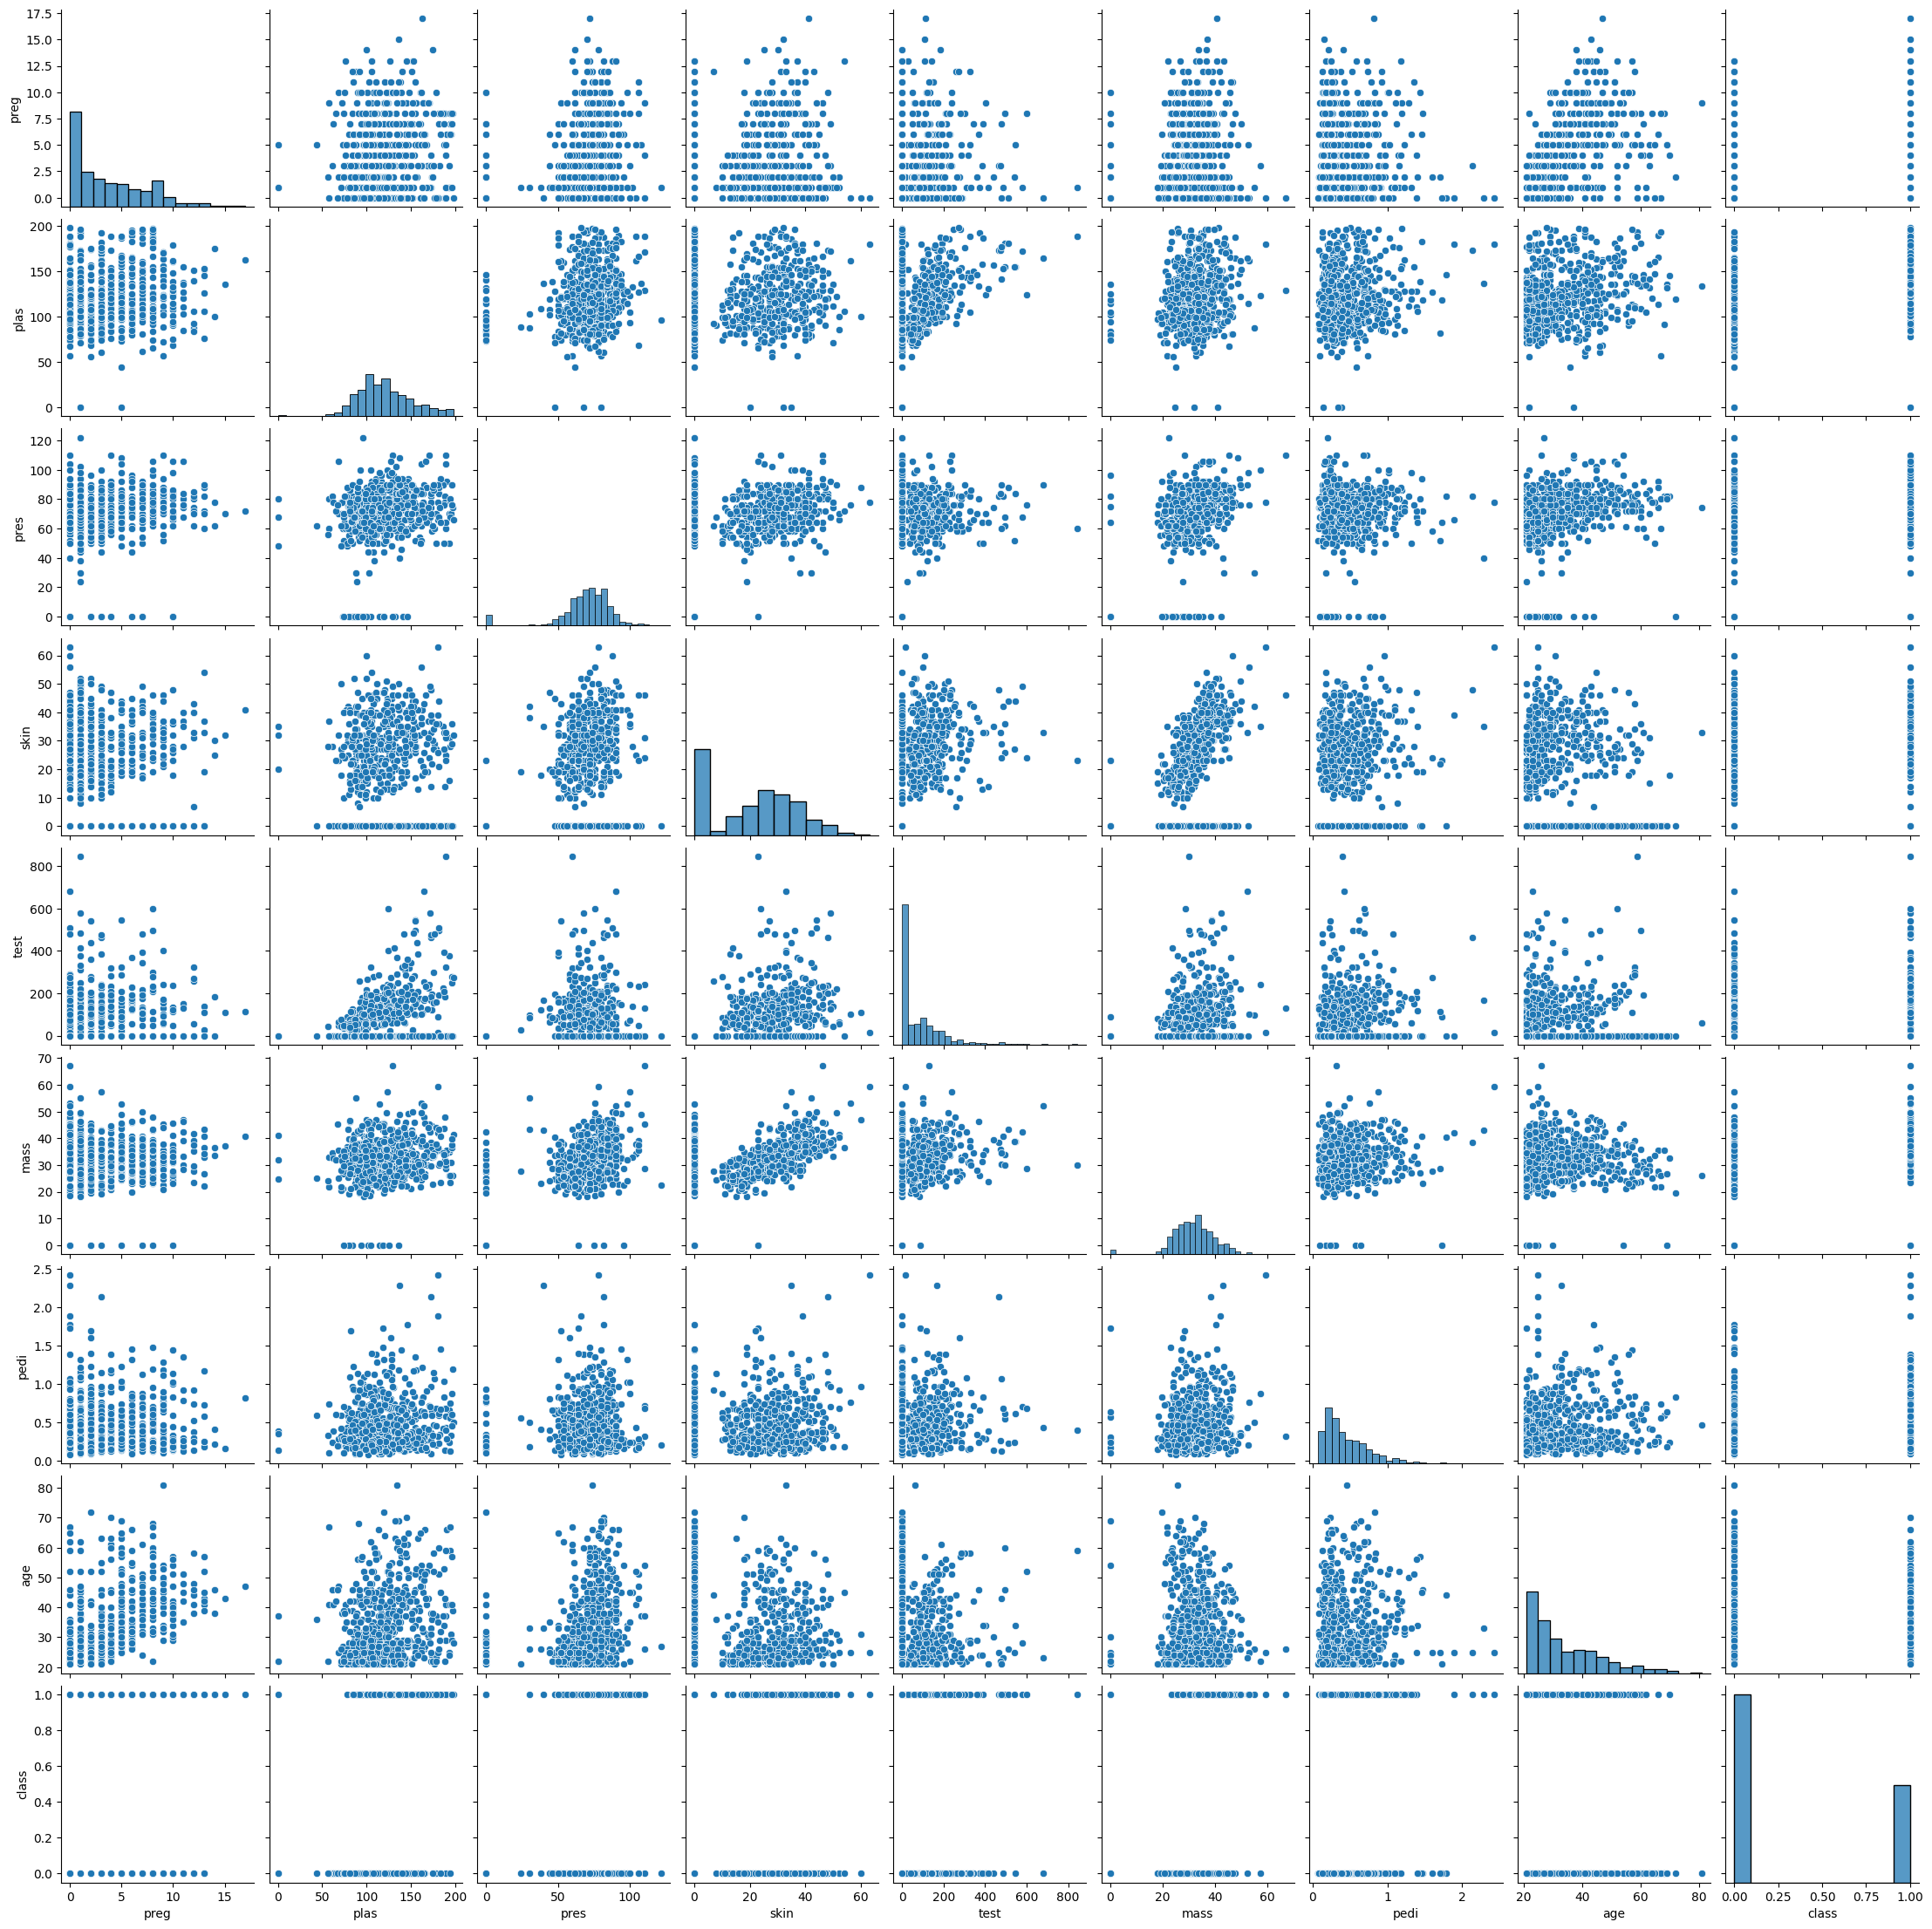

In [13]:
# Veamos como se comportan frente a la target
# bt.plot_categorical_relationship_fin(train_set, target, 'preg', relative_freq = True, show_values = True)
sns.pairplot(train_set)

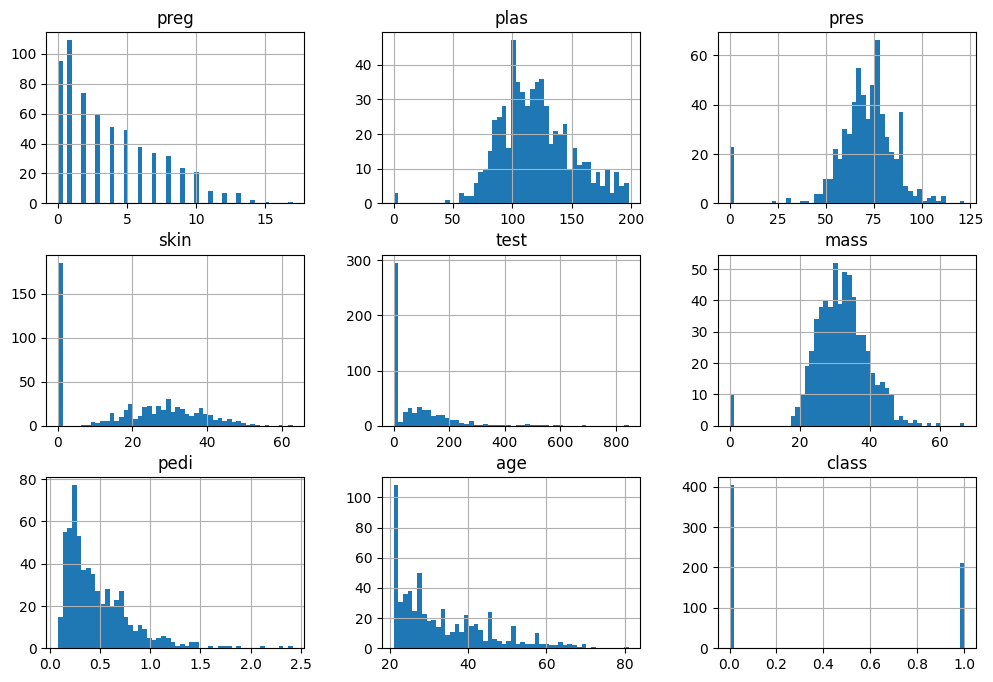

In [14]:
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [15]:
# plas, pres, mass tienen una distribución mas o menos normal, 
# Sin embargo el resto tienen valores capados (skin, age) y sus diatribuciones tienen colas largas. 
# Skin si no fuera por los capados tendría una distribución normal
# En principio para los arboles no necesitamos transformar las variables numéricas será nuestro baseline


In [16]:
# Me quedo con todas las variables porque aparentemente todas influyen con la target

In [17]:
# Hacemos los conjuntos
X_train =train_set[features_num]
y_train = train_set[target]

X_test =test_set[features_num]
y_test = test_set[target]

In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

base_clf = RandomForestClassifier (max_depth= 5, random_state= 42)

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score (base_clf, X_train, y_train, cv = 5, scoring= 'balanced_accuracy')

array([0.67680776, 0.68915344, 0.74162257, 0.63244048, 0.71875   ])

In [22]:
# Me quedo con la media de las 5 métricas obtenidas anteriormente
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print('Recall medio:', np.mean(cross_val_score(base_clf, X_train, y_train, cv= 5, scoring= 'balanced_accuracy')))

Recall medio: 0.6917548500881834


In [23]:
#Entrenamos el árbol
base_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [24]:
print(classification_report(y_train, base_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       403
           1       0.86      0.70      0.77       210

    accuracy                           0.86       613
   macro avg       0.86      0.82      0.84       613
weighted avg       0.86      0.86      0.86       613



In [25]:
# Comparado con la anterior, se ve que está mejor, pero no nos fiemos

In [26]:
pd.DataFrame({'features': base_clf.feature_names_in_, 'importance':base_clf.feature_importances_})

,features,importance
0,preg,0.072376
1,plas,0.344758
2,pres,0.060907
3,skin,0.045640
4,test,0.069139
5,mass,0.179415
6,pedi,0.083317
7,age,0.144449


In [27]:
xgb_clf = XGBClassifier (max_depth = 5, random_state = 42)

lgb_clf = LGBMClassifier (max_depth = 5, random_state = 42, verbose = -1, n_jobs= -1)

In [28]:
# Sacar las metricas para cada modelo
print('Recall medio Random Forest:', np.mean(cross_val_score(base_clf, X_train, y_train, cv= 5, scoring= 'balanced_accuracy')))
print('Recall medio XGBClassifier:', np.mean(cross_val_score(xgb_clf, X_train, y_train, cv= 5, scoring= 'balanced_accuracy')))
print('Recall medio LGBMClassifier:', np.mean(cross_val_score(lgb_clf, X_train, y_train, cv= 5, scoring= 'balanced_accuracy')))

Recall medio Random Forest: 0.6917548500881834
Recall medio XGBClassifier: 0.6806349206349207
Recall medio LGBMClassifier: 0.663968253968254
